<a href="https://colab.research.google.com/github/MFRoz1/Simple-Linear-Regression-to-Predict-Salary/blob/main/Salary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data diambil dari kaggle
link : https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

**Desc** : Salary Dataset in CSV for Simple linear regression. It has also been used in Machine Learning A to Z course of my series.

Linear regression

In [ ]:
#Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
#Read data set
ds = pd.read_csv('Salary_dataset.csv')
ds

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
ds.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [ ]:
ds.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
ds.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [ ]:
#Karena kolom unnamed tidak diperlukan maka bisa di drop
ds_drop = ds.drop(columns=['Unnamed: 0'], axis = 1)

In [ ]:
#Cek kolom kembali
ds_drop.columns

Index(['YearsExperience', 'Salary'], dtype='object')

Data yang diketahui adalah lama pengalaman dan gaji, maka data ini akan digunakan untuk memprediksi kenaikan gaji sejalan dengan lama pengalaman bekerja.

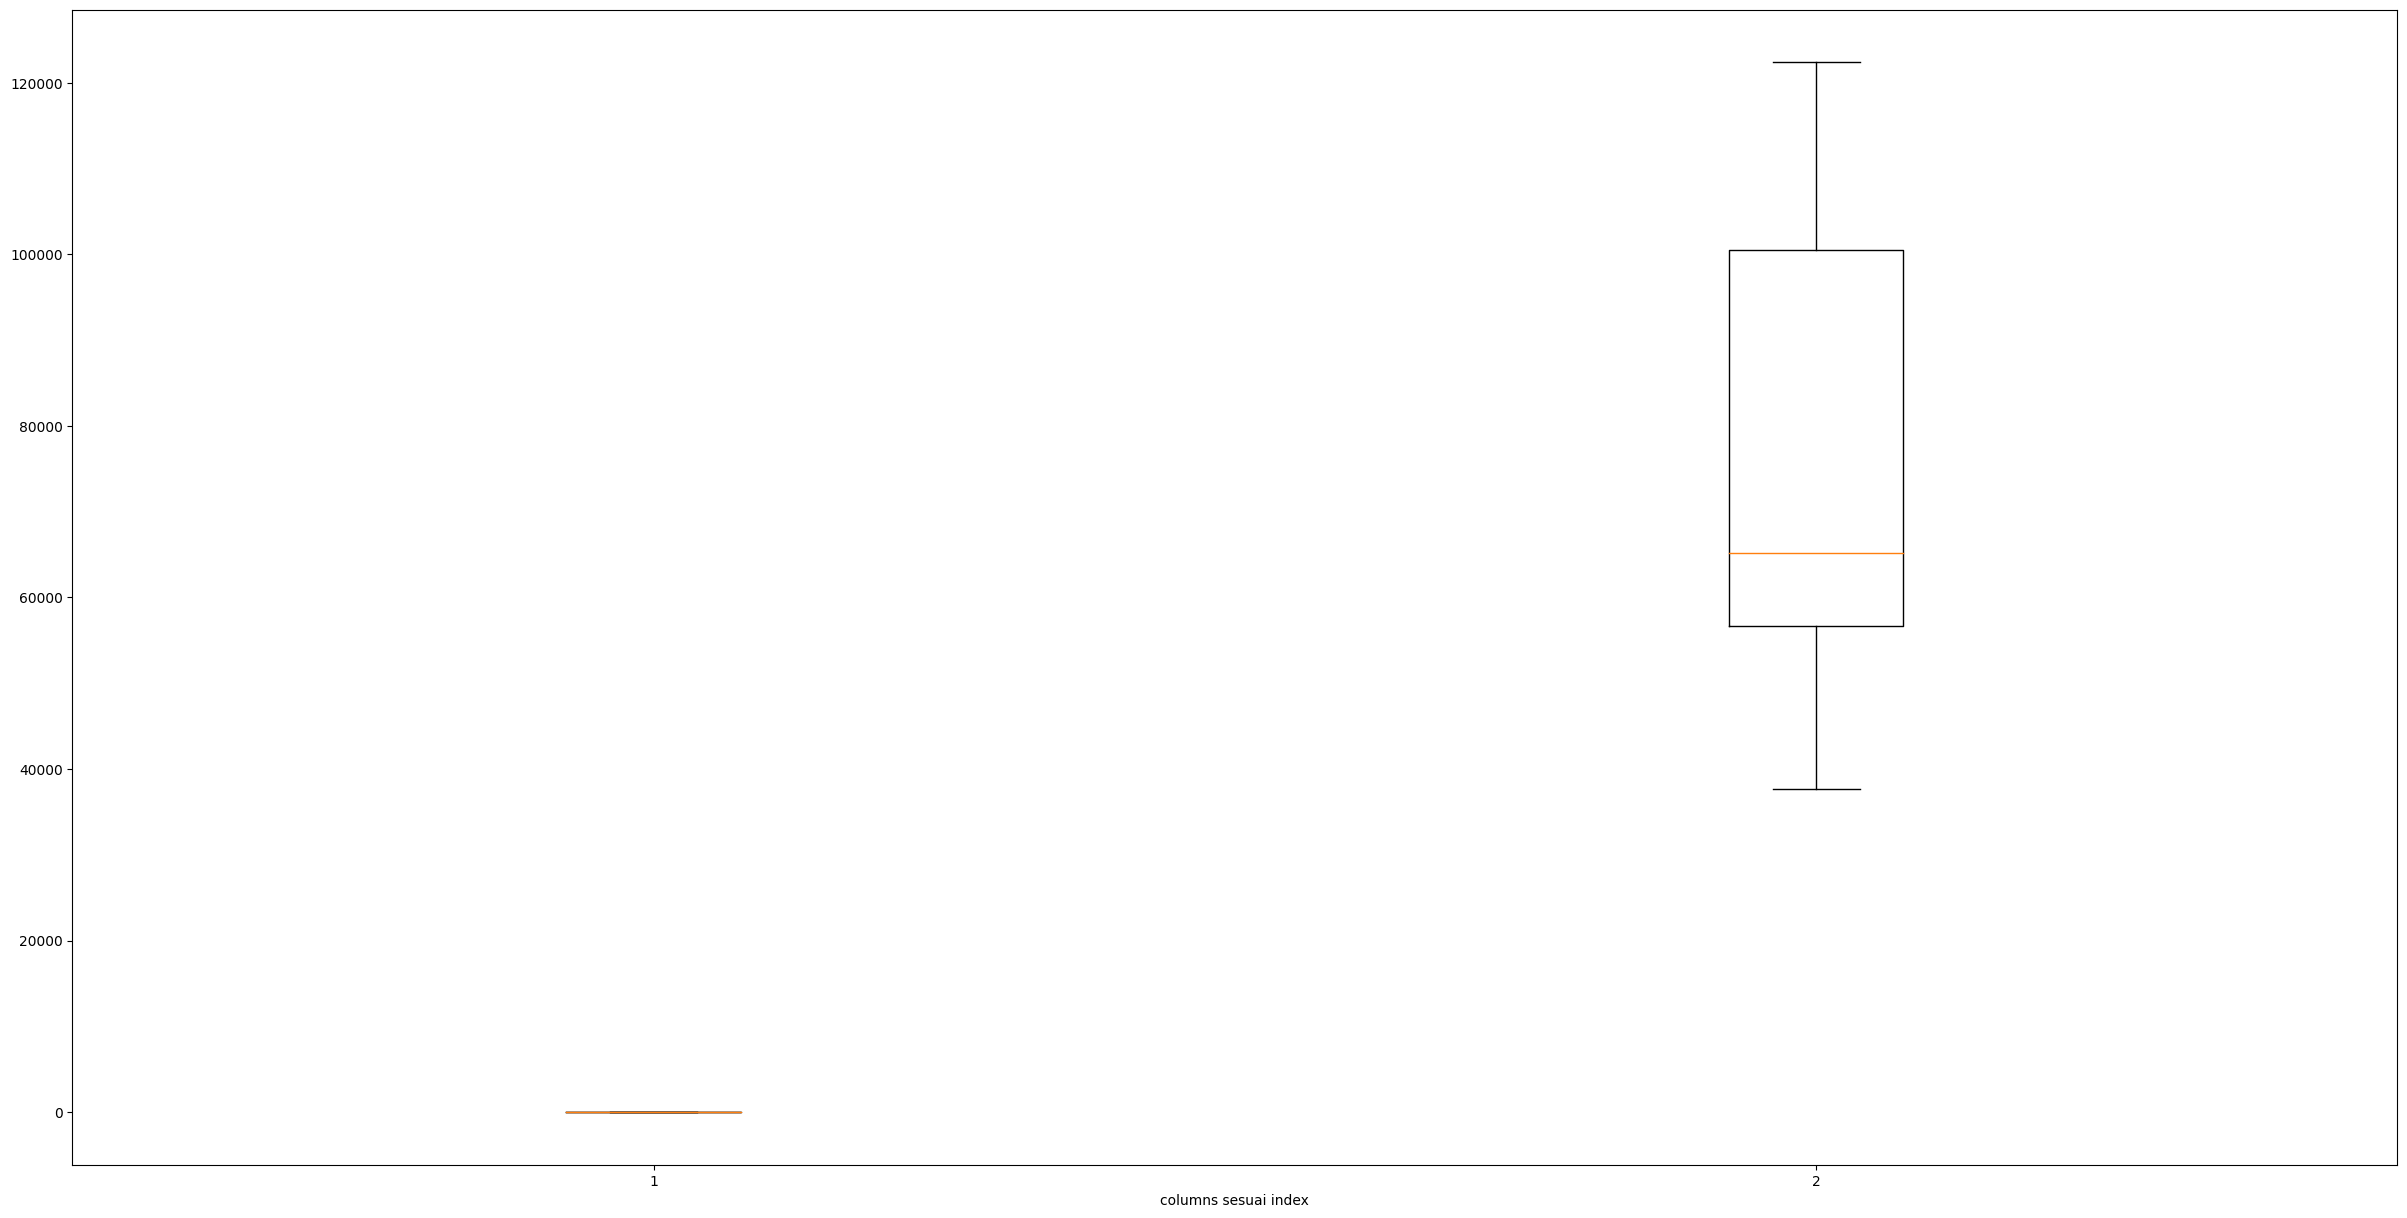

In [ ]:
#coba cek outlier keseluruhan
plt.figure(figsize = (30,15))
plt.boxplot(ds_drop)
plt.xlabel('columns sesuai index')
plt.show()

dari pengecekan outlier 2 kolom diatas menggunakan 2 package menunjukkan bahwa tidak terdeteksi outlier.

Karena ini berhubungan dengan nilai nuimerik, maka kita akan mencoba menggunakan regresi

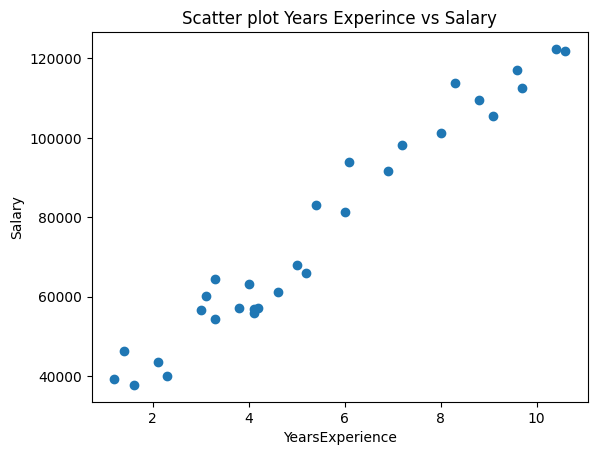

In [ ]:
#Mencoba menggunakan scatter plot dari data ds_drop
plt.scatter(ds_drop.YearsExperience, ds_drop.Salary)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title("Scatter plot Years Experince vs Salary")
plt.show()

Dari gambar dapat diketahui bahwa terdapat hubungan antara YearsExperience dan Salary. Yaitu semakin lama pengalamannya maka semakin tinggi pula penghasilannya

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
# Predictor = X, Target = y

x = ds_drop['YearsExperience'].values.reshape(-1,1)
y = ds_drop['Salary'].values.reshape(-1,1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# Predictor = X, Target = y

lr = LinearRegression()
lr.fit(x_train, y_train)

#Prediksi
y_pred = lr.predict(x_test)
print(y_pred)

[[ 40818.78327049]
 [123189.08258899]
 [ 65155.46261459]
 [ 63283.41035735]
 [115700.87356004]
 [108212.66453108]
 [116636.89968866]
 [ 64219.43648597]
 [ 76387.77615802]]


In [ ]:
intercept = lr.intercept_
slope = lr.coef_[0]

print("Intercept : ", intercept)
print("Slope :", slope)

Intercept :  [25842.36521258]
Slope : [9360.26128619]


Jadi didapatkan model

Y predict = 25842,37 + 9360,26 X

Yang artinya jika X bernilai 0 atau seseorang dengan 0 tahun pengalaman akan mendapat gaji sebesar Rp 25.842,37 dan akan naik sebesar Rp 9.360,26 tiap 1 tahun pengalaman. Jika seseorang memiliki 1 tahun pengalaman maka gaji yang diperoleh adalah 25.842,37 + 9360,26 = Rp 35.202,63. Jika 2 tahun pengalam tinggal dikali 2 untuk slope nya sehingga 25.842,37 + 9360,26(2) = Rp 44.562,89

In [ ]:
# Evaluasi kinerja model menggunakan metrik evaluasi dan R2
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("R2: ", r2)

R2:  0.9740993407213511


Artinya variabel predicotr bisa menjelaskan 97,4% model sedangkan sisanya 2,6% berasal dari luar model

In [ ]:
lr.score(x_test, y_test)

0.9740993407213511

Hasil score dan pengukuran menggunakan R2 menunjukkan bahwa model ini akurat